In [3]:
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [18]:
data = pd.read_csv('StStephens.csv', parse_dates= ['created_at'],na_values=[-99.9], index_col=['created_at'])
data.head()

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,PM1.0_CF1B_ug/m3,PM2.5_CF1B_ug/m3,PM10.0_CF1B_ug/m3,UptimeMinutesB,ADCB,PressureB_hpa,IAQB,PM2.5_ATMB_ug/m3
created_at,,,,,,,,,,,,,,,,
2020-05-21 20:40:00+00:00,1.90,3.13,3.65,16.0,-83.0,69.0,48.25,3.13,3.34,4.54,4.99,16188.0,0.01,1010.29,NaN,4.54
2020-05-21 20:50:00+00:00,1.74,2.82,3.27,25.0,-83.2,69.0,49.00,2.82,3.00,4.13,4.55,18448.0,0.01,1010.18,NaN,4.13
2020-05-21 21:00:00+00:00,1.79,2.90,3.36,35.0,-82.2,69.0,49.00,2.90,2.99,3.99,4.20,18902.4,0.01,1010.02,NaN,3.99
2020-05-21 21:10:00+00:00,1.79,2.92,3.20,45.0,-84.6,69.0,49.00,2.92,3.00,3.87,4.08,18926.4,0.01,1010.03,NaN,3.87
2020-05-21 21:20:00+00:00,1.72,3.04,3.59,55.0,-82.6,69.0,49.00,3.04,2.80,3.82,4.00,19030.4,0.01,1010.12,NaN,3.82


In [8]:
data.describe()

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,PM1.0_CF1B_ug/m3,PM2.5_CF1B_ug/m3,PM10.0_CF1B_ug/m3,UptimeMinutesB,ADCB,PressureB_hpa,IAQB,PM2.5_ATMB_ug/m3
count,91183.000000,91183.000000,91183.000000,91183.000000,91183.000000,81643.000000,81643.000000,91183.000000,91208.000000,91208.000000,91208.000000,91208.000000,91153.000000,81666.000000,0.0,91208.000000
mean,8.058117,13.890939,15.633955,7703.700538,-84.653548,51.253442,65.865185,12.540171,9.726069,15.557402,17.302335,18221.632110,0.009958,995.621449,NaN,13.923092
std,11.156590,19.743311,22.129500,10220.272326,2.374144,11.089738,12.726781,14.636013,12.705406,21.430614,24.641926,475.353532,0.000645,13.069764,NaN,15.730754
min,0.000000,0.000000,0.000000,1.000000,-96.000000,22.000000,12.000000,0.000000,0.000000,0.000000,0.000000,10240.000000,0.000000,951.260000,NaN,0.000000
25%,1.650000,3.220000,4.080000,1376.000000,-86.200000,43.200000,60.000000,3.220000,2.350000,3.620000,4.100000,17984.000000,0.010000,987.130000,NaN,3.620000
50%,4.350000,7.080000,8.180000,3947.000000,-84.800000,50.000000,69.000000,7.080000,5.550000,8.120000,8.810000,18152.000000,0.010000,997.380000,NaN,8.110000
75%,10.320000,16.980000,18.680000,8851.750000,-83.000000,58.800000,74.000000,16.960000,12.410000,19.280000,20.980000,18667.200000,0.010000,1004.470000,NaN,19.250000
max,197.210000,533.780000,694.250000,59313.000000,-61.800000,102.400000,100.000000,358.350000,203.210000,505.860000,692.930000,19608.000000,0.010000,1032.140000,NaN,339.440000


In [13]:
data.index.values

array(['2020-05-21 20:40:00 UTC', '2020-05-21 20:50:00 UTC',
       '2020-05-21 21:00:00 UTC', ..., '2021-11-08 23:30:00 UTC',
       '2021-11-08 23:40:00 UTC', '2021-11-08 23:50:00 UTC'], dtype=object)

In [25]:
data_hourly = data.resample('H').max()
data_hourly

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,PM1.0_CF1B_ug/m3,PM2.5_CF1B_ug/m3,PM10.0_CF1B_ug/m3,UptimeMinutesB,ADCB,PressureB_hpa,IAQB,PM2.5_ATMB_ug/m3
created_at,,,,,,,,,,,,,,,,
2020-05-21 20:00:00+00:00,1.90,3.13,3.65,25.0,-83.00,69.00,49.00,3.13,3.34,4.54,4.99,18448.0,0.01,1010.29,NaN,4.54
2020-05-21 21:00:00+00:00,1.82,3.04,3.59,85.0,-82.20,69.00,49.00,3.04,3.00,3.99,4.20,19030.4,0.01,1010.12,NaN,3.99
2020-05-21 22:00:00+00:00,2.50,3.94,4.05,145.0,-80.80,69.00,49.00,3.94,3.81,5.15,5.37,18928.0,0.01,1009.00,NaN,5.15
2020-05-21 23:00:00+00:00,5.56,8.34,9.02,205.0,-83.00,69.00,50.00,8.34,7.81,10.97,11.57,18928.0,0.01,1007.83,NaN,10.97
2020-05-22 00:00:00+00:00,8.10,12.63,13.53,265.0,-82.60,69.00,50.00,12.63,10.92,15.93,17.05,18928.0,0.01,1006.55,NaN,15.93
2020-05-22 01:00:00+00:00,10.22,15.15,16.44,325.0,-82.60,69.00,50.00,15.15,13.26,19.08,20.42,18859.2,0.01,1004.41,NaN,19.08
2020-05-22 02:00:00+00:00,10.34,16.19,17.76,385.0,-82.60,69.00,50.00,16.19,13.76,20.52,21.82,18825.6,0.01,1003.39,NaN,20.52
2020-05-22 03:00:00+00:00,10.49,15.90,16.96,445.0,-83.20,69.00,50.00,15.90,13.93,20.34,21.77,18894.4,0.01,1001.85,NaN,20.34
2020-05-22 04:00:00+00:00,8.39,12.87,14.08,505.0,-79.80,69.00,50.80,12.87,11.19,15.91,17.22,19166.4,0.01,1001.00,NaN,15.91


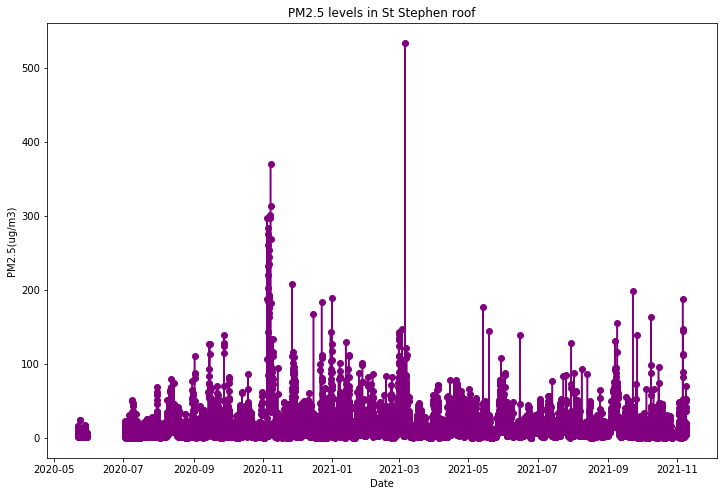

In [30]:
fig,ax = plt.subplots(figsize=(12, 8))
ax.plot(data_hourly.index.values, data_hourly['PM2.5_CF1_ug/m3'].values, '-o', color='purple')

ax.set(xlabel='Date', ylabel='PM2.5(ug/m3)', title='PM2.5 levels in St Stephen roof')

plt.show()

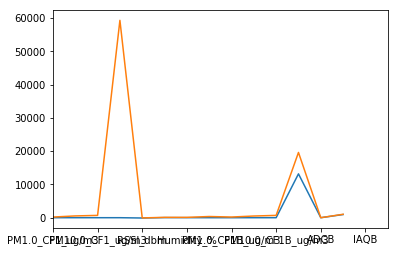

In [57]:
data_hourly.min().plot(label='min')
data_hourly.max().plot(label='max')

In [32]:
data_Nov2021 = data_hourly['2021-11-03': '2021-11-09']
data_Nov2021

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,PM1.0_CF1B_ug/m3,PM2.5_CF1B_ug/m3,PM10.0_CF1B_ug/m3,UptimeMinutesB,ADCB,PressureB_hpa,IAQB,PM2.5_ATMB_ug/m3
created_at,,,,,,,,,,,,,,,,
2021-11-03 00:00:00+00:00,28.46,47.55,51.50,424.00,-82.00,46.20,97.00,39.91,33.13,53.92,59.54,18603.20,0.01,983.88,NaN,44.40
2021-11-03 01:00:00+00:00,20.51,37.27,40.81,486.00,-81.20,48.00,92.00,34.09,22.92,39.13,44.83,18658.67,0.01,983.98,NaN,36.00
2021-11-03 02:00:00+00:00,19.61,35.73,39.81,544.00,-88.00,48.00,93.40,33.12,21.65,38.62,44.13,18502.40,0.01,984.04,NaN,35.79
2021-11-03 03:00:00+00:00,18.00,32.73,36.17,604.00,-85.60,48.00,95.00,31.34,19.91,35.09,39.32,18872.00,0.01,984.48,NaN,33.51
2021-11-03 04:00:00+00:00,8.03,14.49,16.04,664.00,-87.20,48.00,97.40,14.49,8.80,15.34,17.44,18636.80,0.01,985.02,NaN,15.34
2021-11-03 05:00:00+00:00,9.18,14.24,15.51,724.00,-86.80,48.40,98.40,13.91,10.78,16.17,17.34,18547.20,0.01,985.42,NaN,15.38
2021-11-03 06:00:00+00:00,11.12,19.25,20.75,787.00,-83.00,49.00,95.00,19.25,12.47,20.86,22.98,18636.80,0.01,986.26,NaN,20.86
2021-11-03 07:00:00+00:00,5.41,8.83,9.67,844.00,-82.00,48.20,91.20,8.83,6.14,9.21,10.09,18718.00,0.01,986.61,NaN,9.21
2021-11-03 08:00:00+00:00,4.91,7.50,8.10,906.00,-81.50,49.00,86.25,7.50,6.98,9.23,9.68,18760.00,0.01,987.65,NaN,9.23


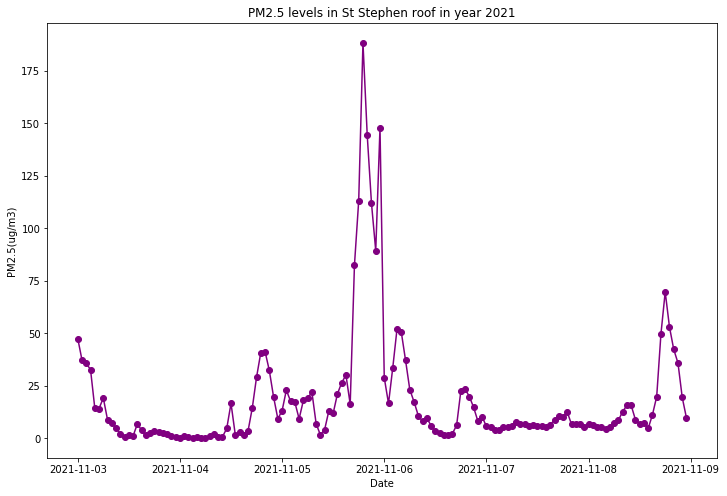

In [47]:
fig,ax = plt.subplots(figsize=(12, 8))
ax.plot(data_Nov2021.index.values, data_Nov2021['PM2.5_CF1_ug/m3'].values, '-o', color='purple')

ax.set(xlabel='Date', ylabel='PM2.5(ug/m3)', title='PM2.5 levels in St Stephen roof in year 2021')

plt.show()

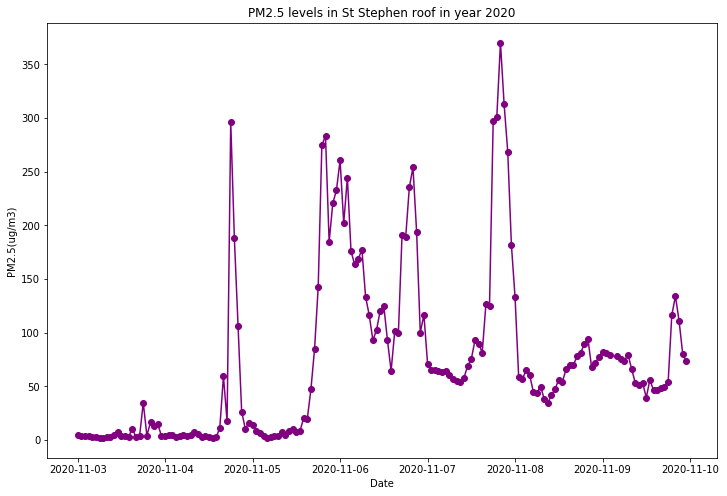

In [48]:
data_Nov2020 = data_hourly['2020-11-03': '2020-11-09']
data_Nov2020
fig,ax = plt.subplots(figsize=(12, 8))
ax.plot(data_Nov2020.index.values, data_Nov2020['PM2.5_CF1_ug/m3'].values, '-o', color='purple')

ax.set(xlabel='Date', ylabel='PM2.5(ug/m3)', title='PM2.5 levels in St Stephen roof in year 2020')

plt.show()

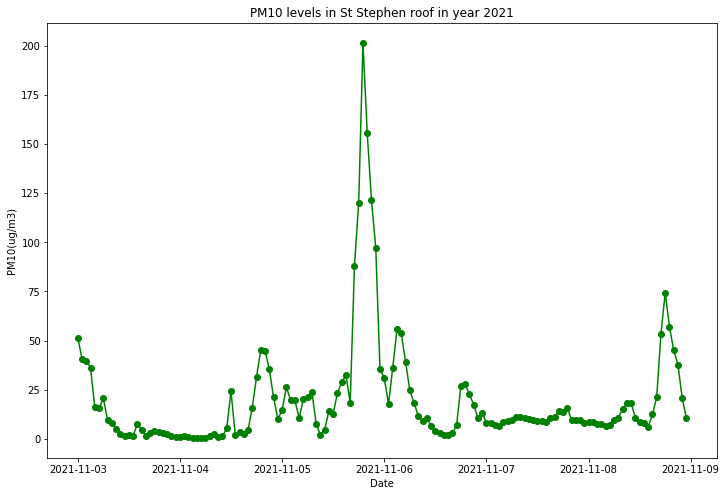

In [52]:
fig,ax = plt.subplots(figsize=(12, 8))
ax.plot(data_Nov2021.index.values, data_Nov2021['PM10.0_CF1_ug/m3'].values, '-o', color='green')

ax.set(xlabel='Date', ylabel='PM10(ug/m3)', title='PM10 levels in St Stephen roof in year 2021')

plt.show()

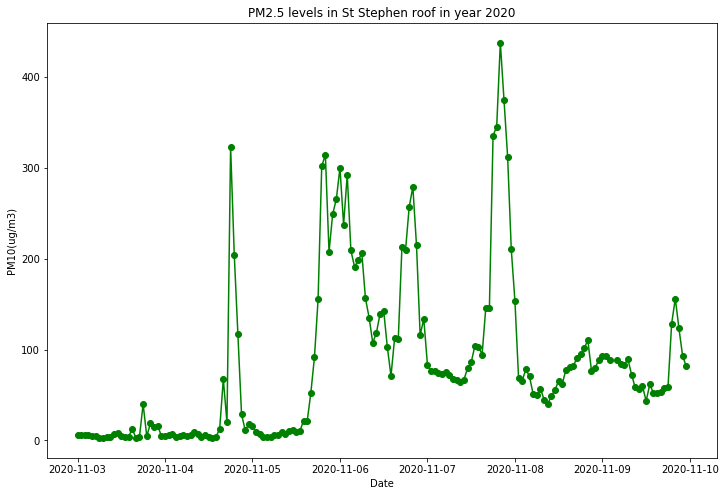

In [51]:
data_Nov2020 = data_hourly['2020-11-03': '2020-11-09']
data_Nov2020
fig,ax = plt.subplots(figsize=(12, 8))
ax.plot(data_Nov2020.index.values, data_Nov2020['PM10.0_CF1_ug/m3'].values, '-o', color='green')

ax.set(xlabel='Date', ylabel='PM10(ug/m3)', title='PM2.5 levels in St Stephen roof in year 2020')

plt.show()

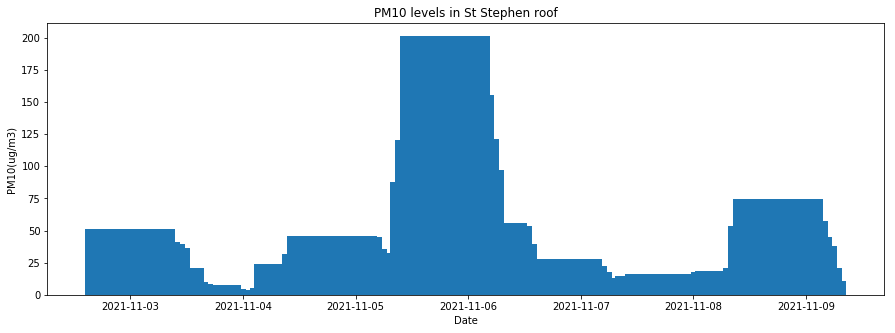

In [44]:
fig,ax = plt.subplots(figsize=(15, 5))
ax.bar(data_Nov2021.index.values, data_Nov2021['PM10.0_CF1_ug/m3'].values)

ax.set(xlabel='Date', ylabel='PM10(ug/m3)', title='PM10 levels in St Stephen roof')

plt.show()

In [53]:
data_hourlyavg = data.resample('H').mean()
data_hourlyavg

,PM1.0_CF1_ug/m3,PM2.5_CF1_ug/m3,PM10.0_CF1_ug/m3,UptimeMinutes,RSSI_dbm,Temperature_F,Humidity_%,PM2.5_ATM_ug/m3,PM1.0_CF1B_ug/m3,PM2.5_CF1B_ug/m3,PM10.0_CF1B_ug/m3,UptimeMinutesB,ADCB,PressureB_hpa,IAQB,PM2.5_ATMB_ug/m3
created_at,,,,,,,,,,,,,,,,
2020-05-21 20:00:00+00:00,1.820000,2.975000,3.460000,20.500000,-83.100000,69.000000,48.625000,2.975000,3.170000,4.335000,4.770000,17318.000000,0.01,1010.235000,NaN,4.335000
2020-05-21 21:00:00+00:00,1.678333,2.778333,3.123333,60.000000,-83.333333,69.000000,49.000000,2.778333,2.826667,3.800000,4.010000,18829.066667,0.01,1009.830000,NaN,3.800000
2020-05-21 22:00:00+00:00,2.031667,3.180000,3.443333,120.000000,-82.966667,69.000000,49.000000,3.180000,3.326667,4.435000,4.708333,18770.933333,0.01,1008.481667,NaN,4.435000
2020-05-21 23:00:00+00:00,4.178333,6.336667,6.833333,180.000000,-83.766667,69.000000,49.500000,6.336667,6.091667,8.223333,8.695000,18797.066667,0.01,1007.293333,NaN,8.223333
2020-05-22 00:00:00+00:00,7.210000,10.825000,11.491667,240.000000,-83.533333,69.000000,49.966667,10.825000,9.715000,13.843333,14.631667,18812.800000,0.01,1005.680000,NaN,13.843333
2020-05-22 01:00:00+00:00,9.080000,13.886667,14.896667,300.000000,-84.633333,69.000000,50.000000,13.886667,12.258333,17.583333,18.728333,18719.466667,0.01,1004.008333,NaN,17.583333
2020-05-22 02:00:00+00:00,10.181667,15.671667,16.946667,360.000000,-83.900000,69.000000,50.000000,15.671667,13.580000,19.505000,20.741667,18763.200000,0.01,1002.461667,NaN,19.505000
2020-05-22 03:00:00+00:00,10.016667,15.406667,16.380000,420.000000,-84.400000,69.000000,50.000000,15.406667,13.043333,19.075000,20.310000,18799.200000,0.01,1001.450000,NaN,19.075000
2020-05-22 04:00:00+00:00,7.431667,11.345000,12.280000,480.000000,-81.900000,69.000000,50.133333,11.345000,9.891667,14.026667,14.906667,18841.066667,0.01,1000.703333,NaN,14.026667


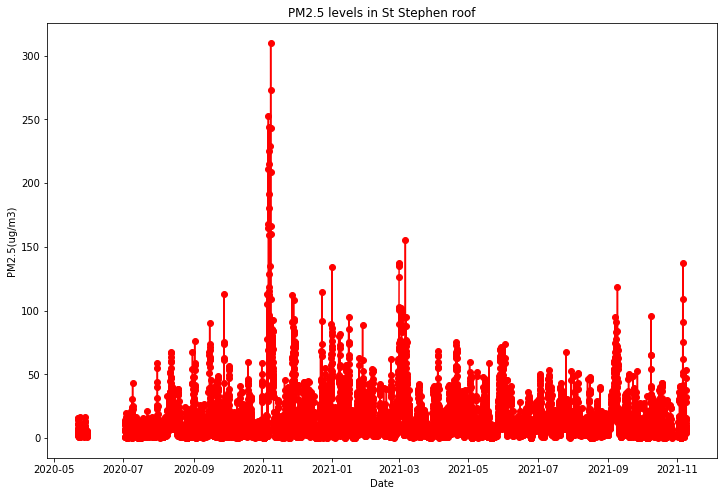

In [54]:
fig,ax = plt.subplots(figsize=(12, 8))
ax.plot(data_hourlyavg.index.values, data_hourlyavg['PM2.5_CF1_ug/m3'].values, '-o', color='red')

ax.set(xlabel='Date', ylabel='PM2.5(ug/m3)', title='PM2.5 levels in St Stephen roof')

plt.show()

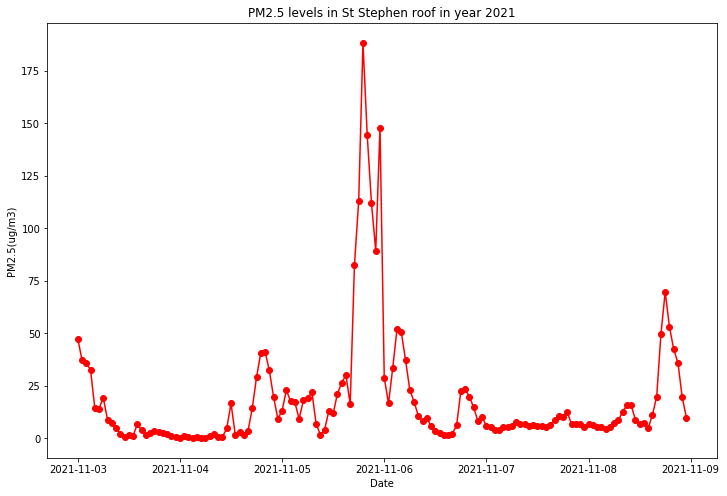

In [55]:
data_Nov2021avg = data_hourly['2021-11-03': '2021-11-09']
data_Nov2021avg
fig,ax = plt.subplots(figsize=(12, 8))
ax.plot(data_Nov2021avg.index.values, data_Nov2021avg['PM2.5_CF1_ug/m3'].values, '-o', color='red')

ax.set(xlabel='Date', ylabel='PM2.5(ug/m3)', title='PM2.5 levels in St Stephen roof in year 2021')

plt.show()